## Exercise Set 1

**Problem 1**

In [90]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

In [91]:
matrix = np.loadtxt('matrix_data.txt') # 10 x 10

evals, v1 = linalg.eig(matrix)
abs_evals = np.absolute(evals)
spectral_rad = np.max(abs_evals)
print(spectral_rad)

1.0044277694480632


In [92]:
iter = 100
save = matrix.shape[0]
v = np.exp(np.random.randn(save))

iter2 = np.zeros(iter)
for i in range(1, iter + 1):
    power = np.linalg.matrix_power(matrix, i)
    multiply = np.matmul(power, v)
    iter2[i-1] = linalg.norm(multiply) ** (1 / i)

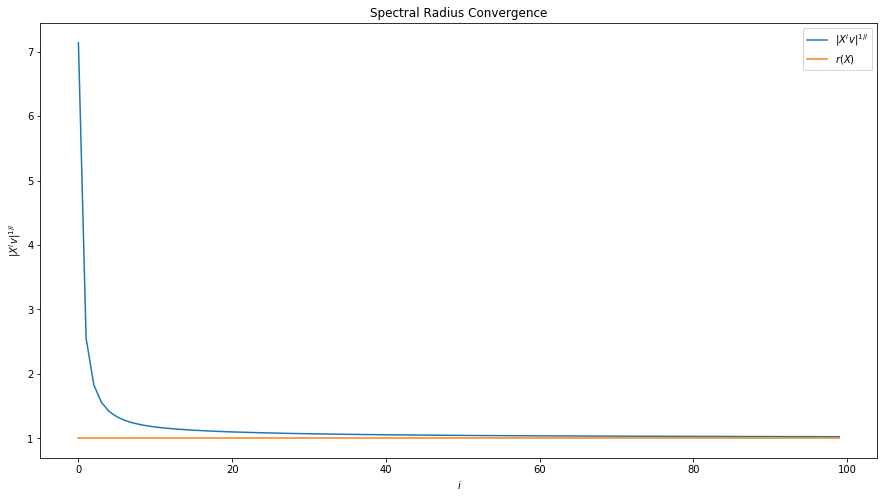

In [93]:
plt.figure(figsize=(15, 8))
plt.plot(iter2[:], label=r'$\| X^i v \|^{1/i}$')
plt.plot([spectral_rad] * iter, label=r'$r(X)$')
plt.xlabel(r'$i$')
plt.ylabel(r'$\| X^i v \|^{1/i}$')
plt.title('Spectral Radius Convergence')
plt.legend()
plt.show()

**Problem 2**

In [105]:
from numba import njit

In [115]:
@njit
def quad_map(x0, n):
    x = np.zeros(n)
    x[0] = x0
    
    for t in range(n-1):
        x[t+1] = 4 * x[t] * (1 - x[t])
    return x

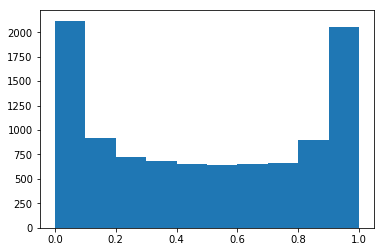

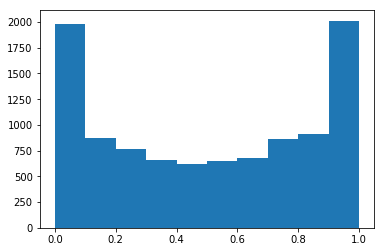

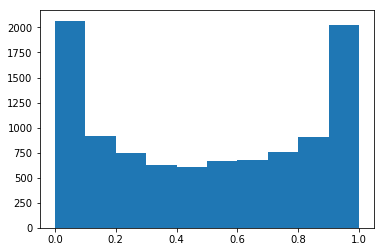

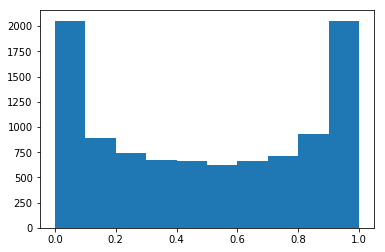

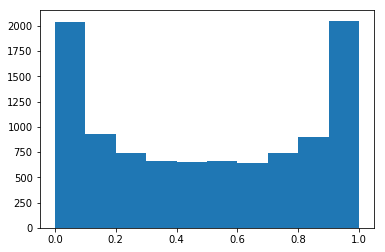

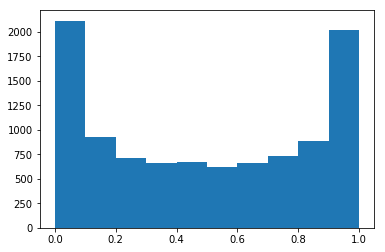

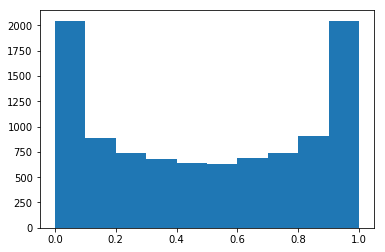

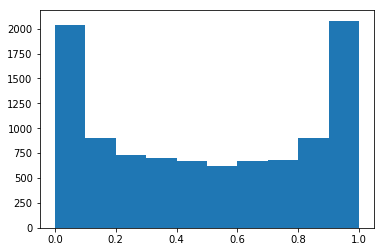

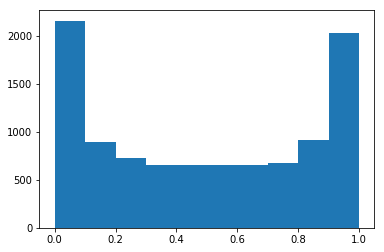

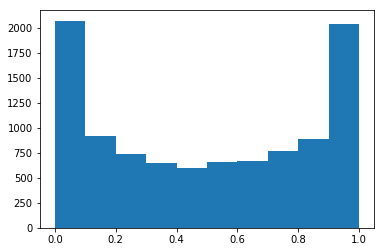

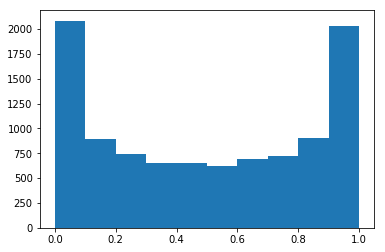

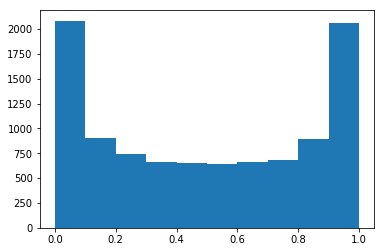

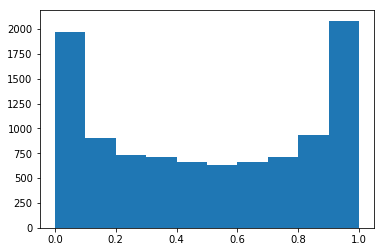

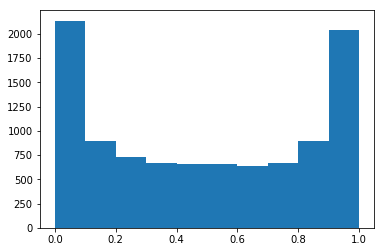

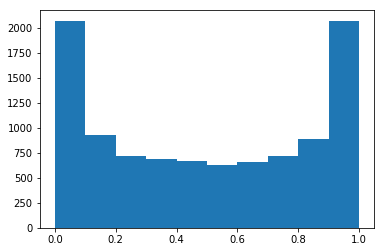

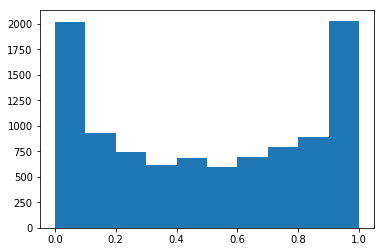

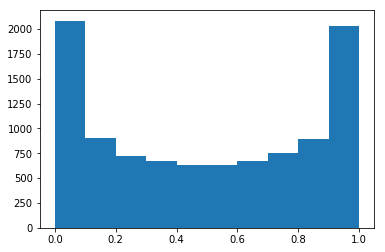

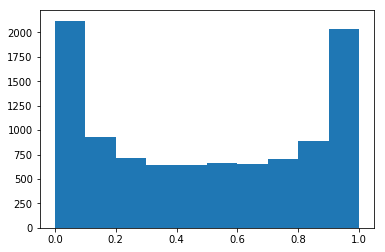

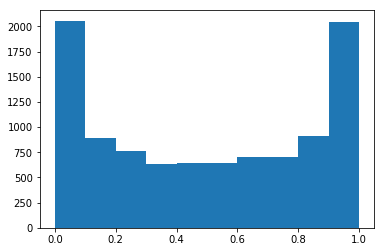

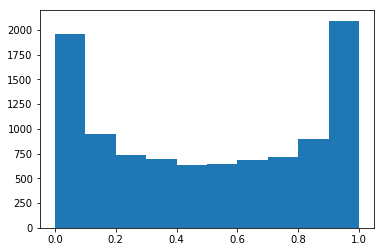

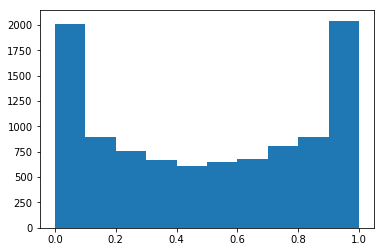

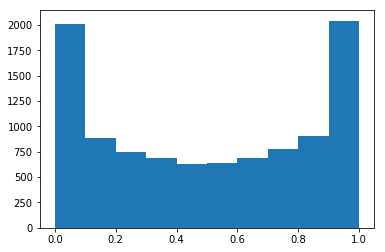

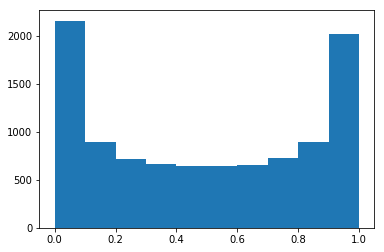

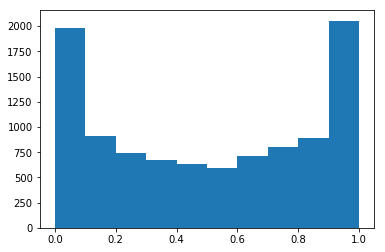

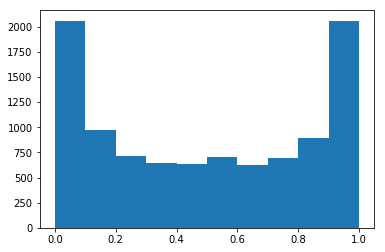

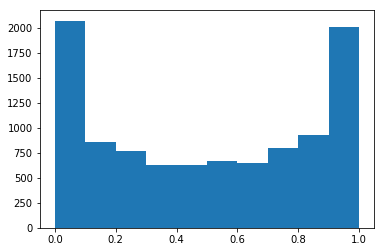

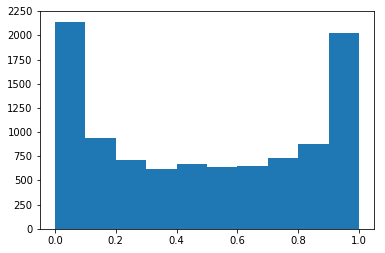

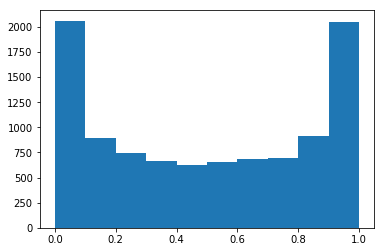

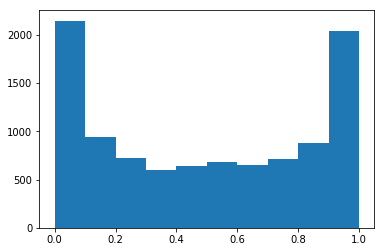

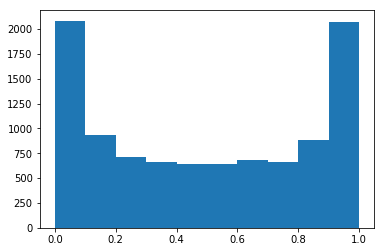

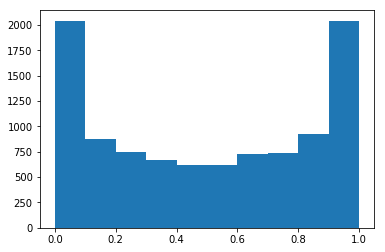

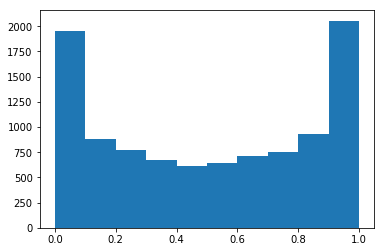

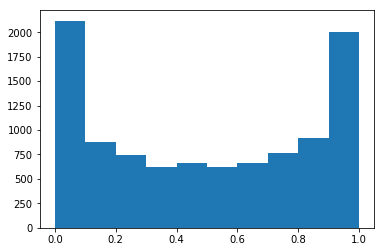

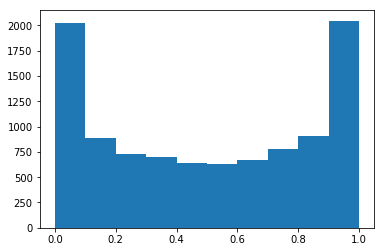

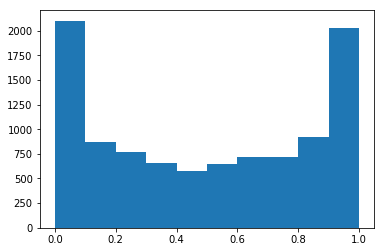

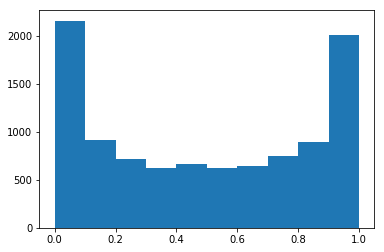

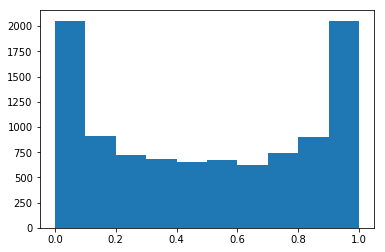

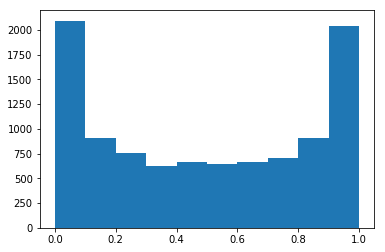

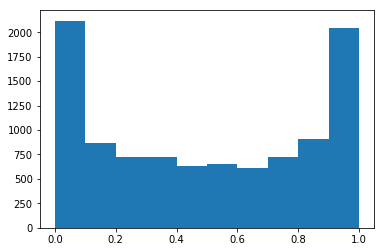

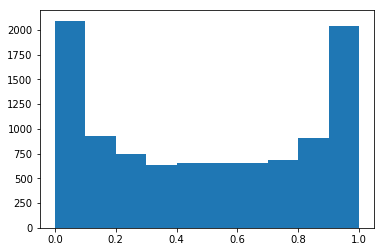

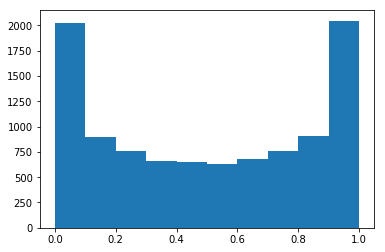

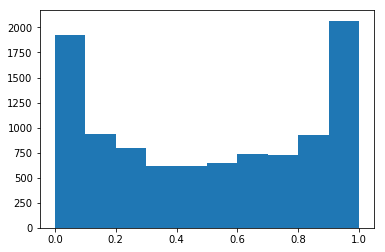

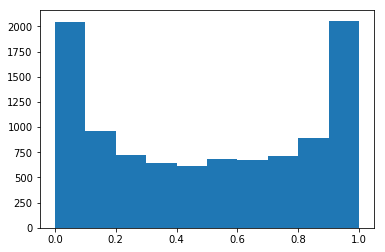

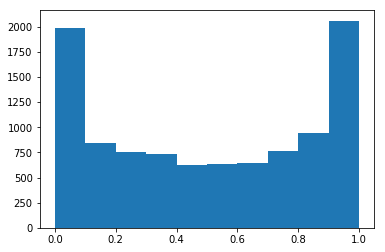

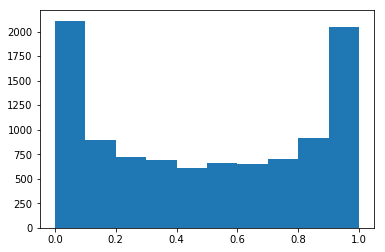

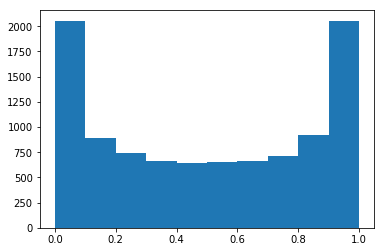

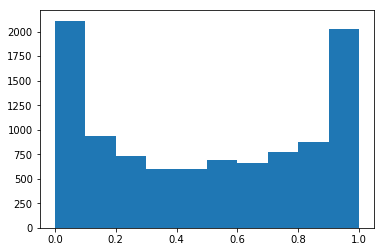

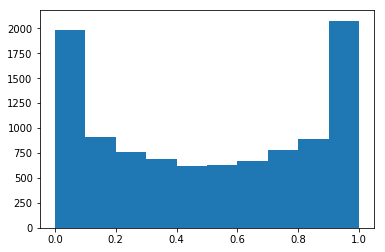

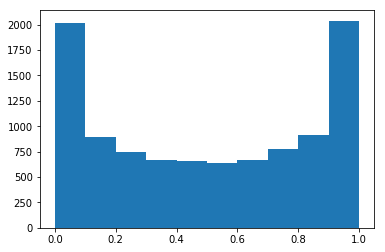

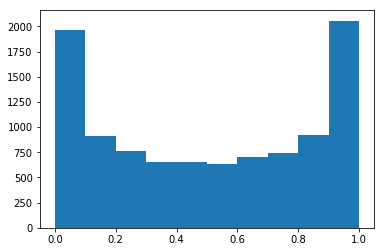

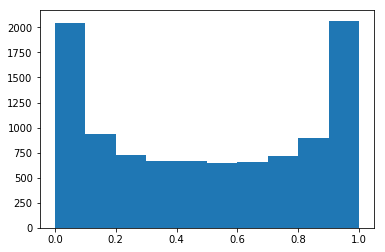

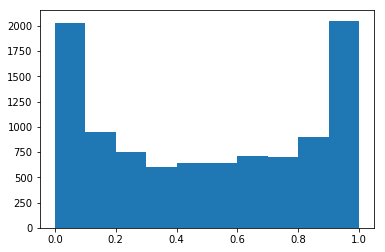

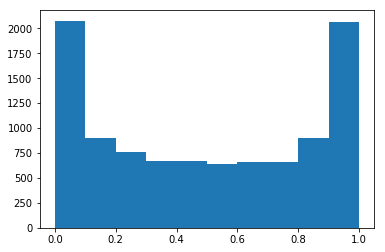

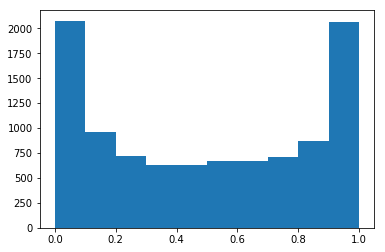

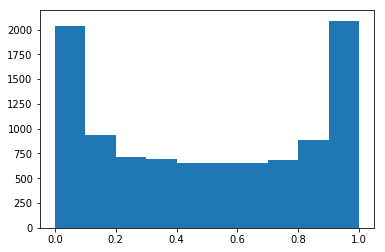

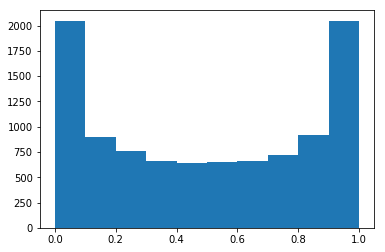

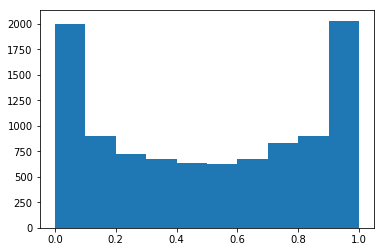

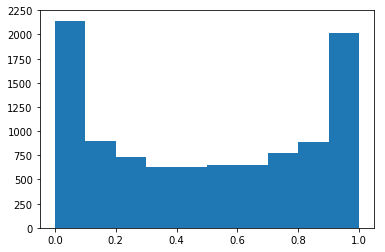

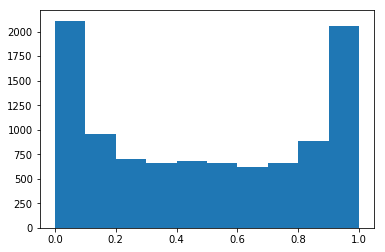

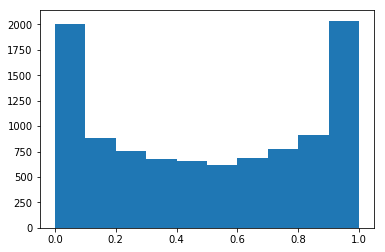

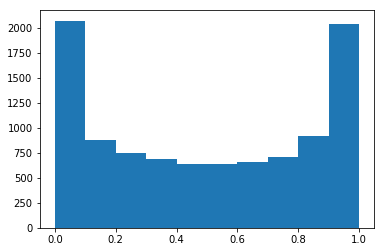

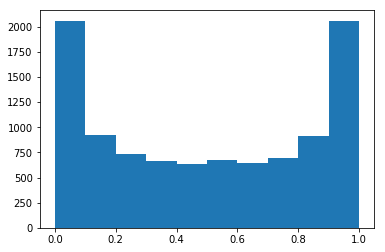

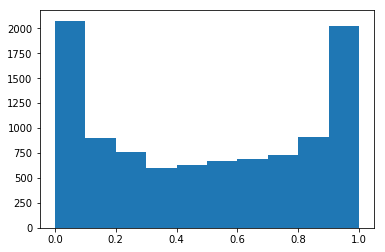

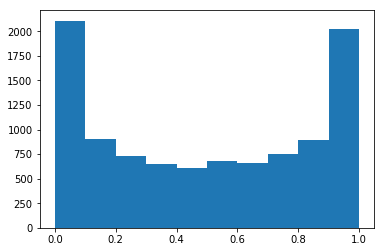

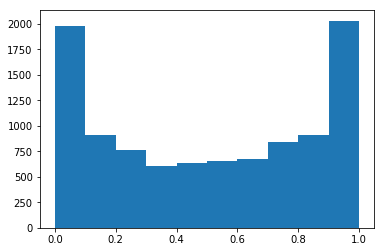

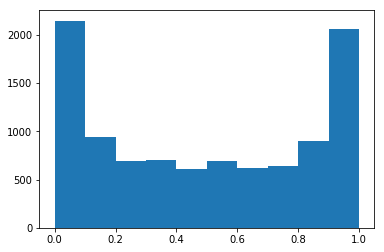

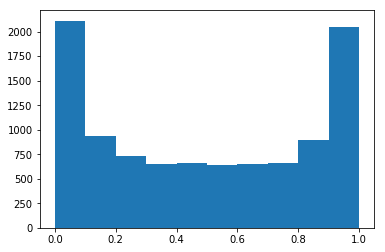

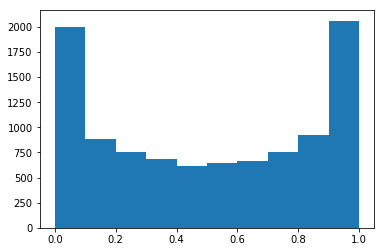

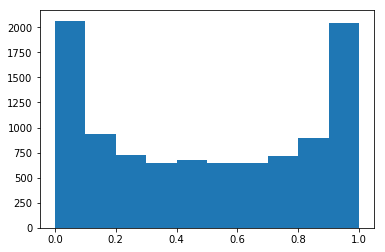

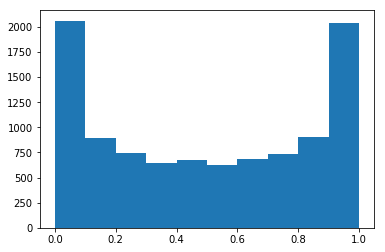

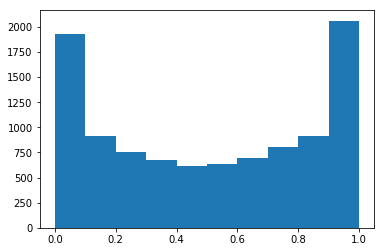

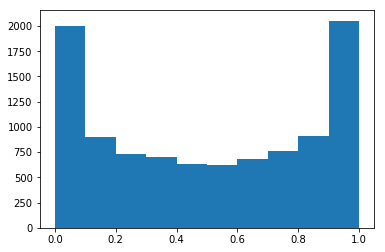

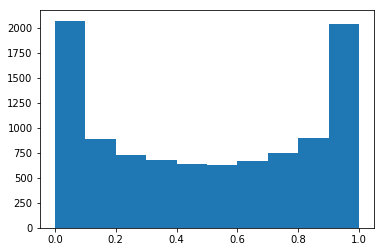

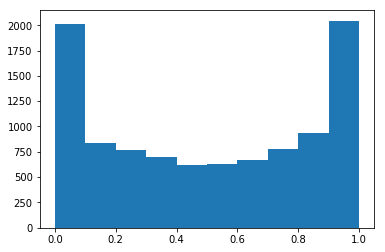

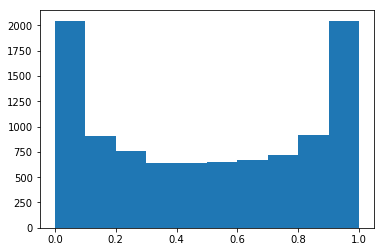

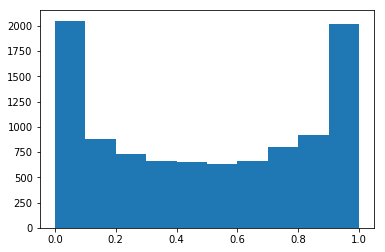

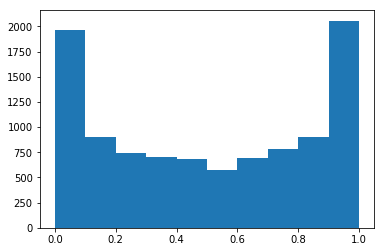

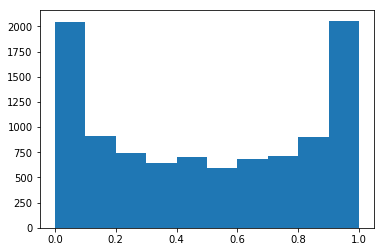

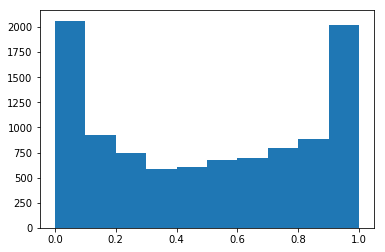

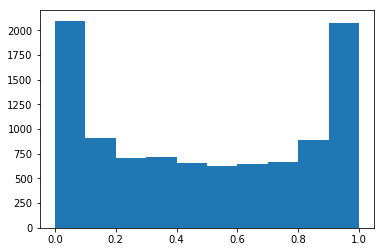

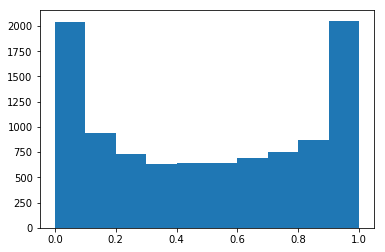

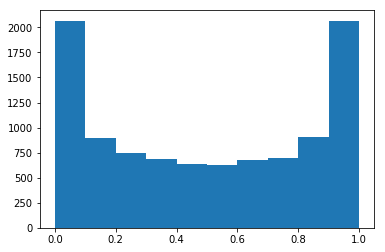

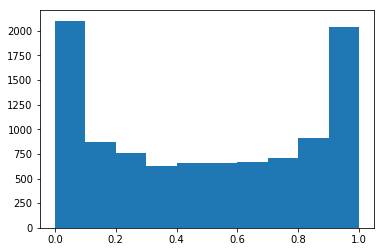

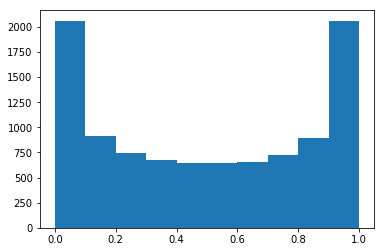

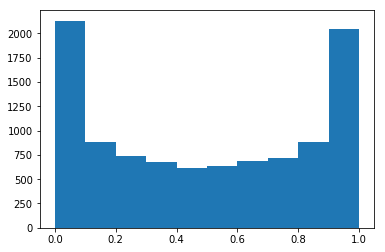

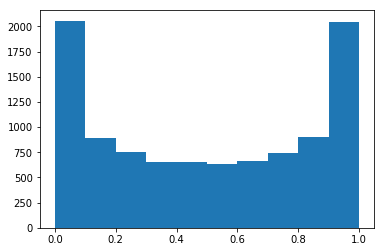

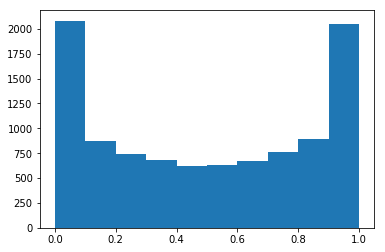

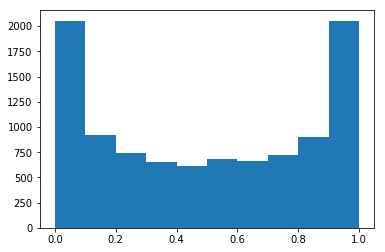

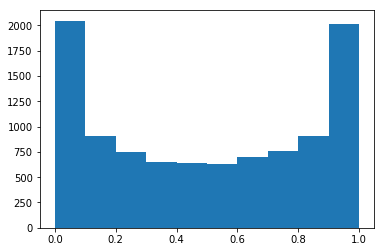

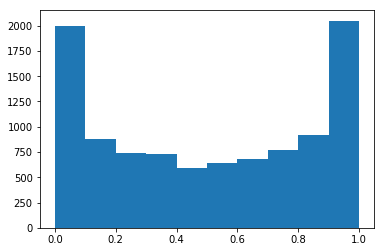

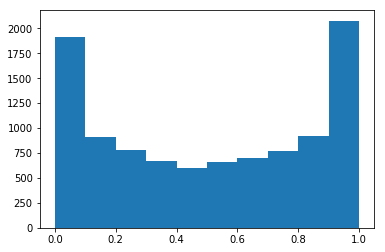

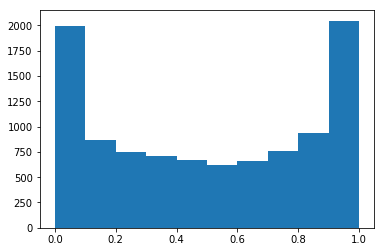

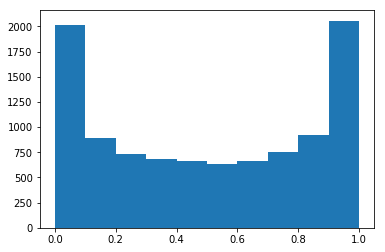

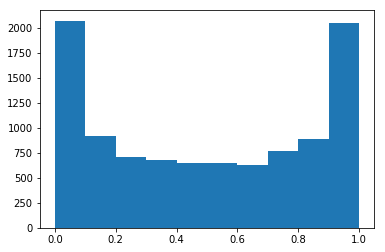

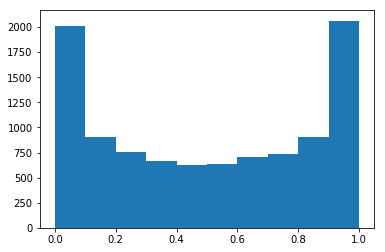

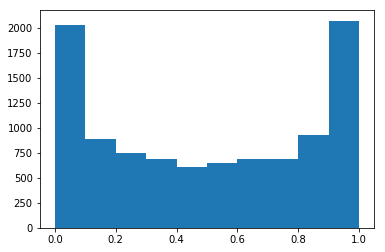

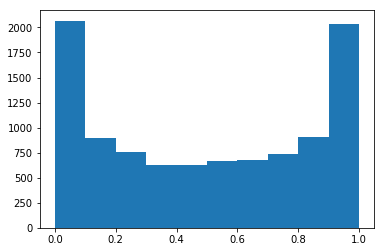

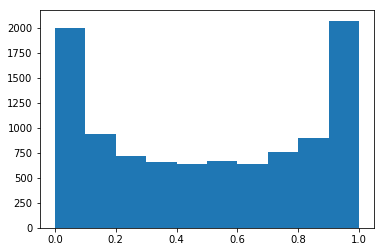

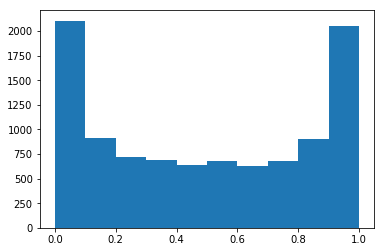

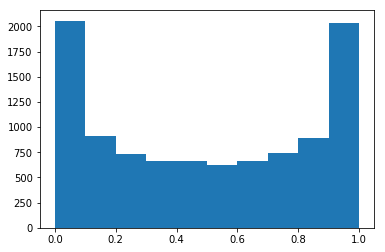

In [116]:
T = 100
n = 10000

for i in range(T):
    x0 = np.random.uniform(0.001, 0.999)
    x = quad_map(x0, n)
    plt.hist(x)
    plt.show()

**Problem 3**

Let $(\mathbb{X}, g)$ be a dynamical system, with $g$ continuous at $\hat{x}\in \mathbb{X}$. Let $\varepsilon > 0$ be given. So, there exists a $\delta >0$ such that $|g(\hat{x})-g(y)|< \varepsilon$ for all $y$, whenever $|\hat{x}-y|<\delta$. 
<br>
Now given $g^t(x)\rightarrow \hat{x}$ for all $\varepsilon > 0$, there exists a $T$ such that $|g^t(x)-\hat{x}|<\varepsilon$ for all $t>T$. Now, choose some $\hat{T}$ such that $|g^t(x)-\hat{x}|<\delta$ for all $t>\hat{T}$. Observe that 
\begin{align}
g(\lim_{t\rightarrow \infty}g^t(x)) &= g(\hat{x})\\
&=\hat{x}
\end{align}
by the fact that $g^t(x)\rightarrow \hat{x}$ and from $g$ being continuous. Therefore, $\hat{x}$ is a steady state of $(\mathbb{X}, g)$ by definition.
<br>
QED

## Exercise Set 2

**Exercise 1**

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, norm
from ipywidgets import interact

In [5]:
class kdens_est():
    
    def __init__(self, X, h=None):
        
        X = np.array(X)
        self.h = h
        self.X = X
        σ_hat = X.std()
        self.n = len(X)
        
        if h is None:
            self.h = ((4 * σ_hat ** 5) / (3* self.n)) ** (1 / 5)
    
    def f(self, x):
        
        X, h, n = self.X, self.h, self.n
        x = np.array(x)
        f_x = np.empty(len(x))
        
        for i, xi in enumerate(x):
            f_x[i] = np.sum(norm.pdf((xi - X) / h))
        
        return f_x / (h * n)

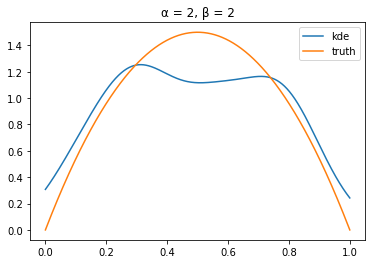

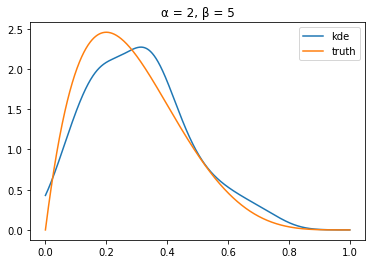

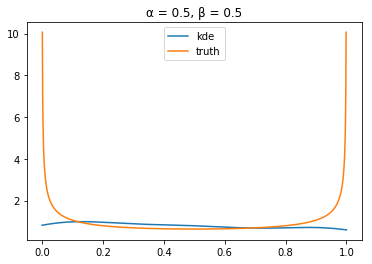

In [13]:
N = 100
xgrid = np.linspace(0, 1, 1000)

for a, b in [(2, 2), (2, 5), (0.5, 0.5)]:
    dist = beta(a,b)
    X = dist.rvs(N)
    kern = kdens_est(X)
    plt.plot(xgrid, kern.f(xgrid), label='kde')
    plt.plot(xgrid, dist.pdf(xgrid), label='truth')
    plt.title(f'α = {a}, β = {b}')
    plt.legend()
    plt.show()

This is not a good estimator of these distributions, even more so for $\alpha=\beta=0.5$

**Exercise 2**

In [15]:
ρ = 0.9
b = 0.0
σ = 0.1
μ = -3
s = 0.2

In [20]:
Ψ_t = norm(loc=μ, scale=s)
Ψ_tp1 = norm(loc=(ρ * μ + b), scale=np.sqrt(ρ**2 * s**2 + σ**2))  

xgrid = np.linspace(μ - 2, μ + 2, 1000)

def updater(N):
    
    plt.plot(xgrid, Ψ_t.pdf(xgrid), label='$\Psi_{t}$')
    plt.plot(xgrid, Ψ_tp1.pdf(xgrid), label='$\Psi_{t+1}$')
    update = ρ * Ψ_t.rvs(size=N) + b + σ * np.random.randn(N)
    kernel = kdens_est(update)
    plt.plot(xgrid, kernel.f(xgrid), label='$\hat{\Psi}_{t+1}$')
    plt.legend()
    plt.show()

In [35]:
interact(updater, N=(2, 100, 2)) # can adjust each parameter as necessary

interactive(children=(IntSlider(value=50, description='N', min=2, step=2), Output()), _dom_classes=('widget-in…

<function __main__.updater(N)>

**Exercise 3**

Let $\varepsilon > 0$ be given such that $0<\varepsilon < 1-r(A)$. Now by Gelfand's formula, there exists $K\in \mathbb{N}$ such that $\big|||A^k||^\frac{1}{k}-r(A)\big|<\varepsilon$
<br>
This implies that $(r(a)-\varepsilon)^k < ||A^k|| < (r(a)+\varepsilon)^k$. Now, $||A^k||>0$, hence the expression above can be denoted as $ 0\le ||A^k|| < (r(a)+\varepsilon)^k$.
<br>
But $0< r(A) + \varepsilon < 1$, thus $(r(A)+\varepsilon)^k \rightarrow 0$ as $k\rightarrow \infty$. This implies that $||A^k||\rightarrow 0$, which implies that $||A^k-0||\rightarrow 0$ as $k\rightarrow \infty$, and thus $A^k \rightarrow 0$ as $k\rightarrow \infty$
<br>
QED

## Exercise Set 3

**Exercise 1**

In [55]:
import numpy as np
import quantecon as qe
import matplotlib.pyplot as plt

In [56]:
P = [[0.222, 0.222, 0.215, 0.187, 0.081, 0.038, 0.029, 0.006],
     [0.221, 0.220, 0.215, 0.188, 0.082, 0.039, 0.029, 0.006],
     [0.207, 0.209, 0.210, 0.194, 0.090, 0.046, 0.036, 0.008],
     [0.198, 0.201, 0.207, 0.198, 0.095, 0.052, 0.040, 0.009],
     [0.175, 0.178, 0.197, 0.207, 0.110, 0.067, 0.054, 0.012],
     [0.182, 0.184, 0.200, 0.205, 0.106, 0.062, 0.050, 0.011],
     [0.123, 0.125, 0.166, 0.216, 0.141, 0.114, 0.094, 0.021],
     [0.084, 0.084, 0.142, 0.228, 0.170, 0.143, 0.121, 0.028]]

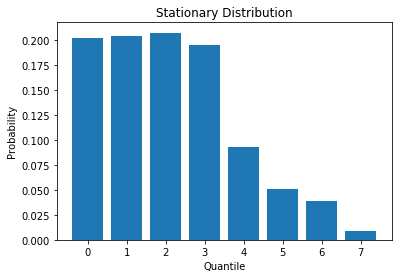

In [57]:
markov = qe.MarkovChain(P)
distrib = markov.stationary_distributions.flatten()
plt.bar(np.arange(0,8), distrib)
plt.xlabel('Quantile')
plt.ylabel('Probability')
plt.title('Stationary Distribution')
plt.show()

**Exercise 2**

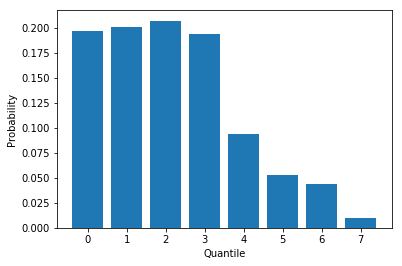

In [70]:
n = 10000
appr = markov.simulate(ts_length = n, init=1)

y0 = (appr == 0).sum()/n
y1 = (appr == 1).sum()/n
y2 = (appr == 2).sum()/n
y3 = (appr == 3).sum()/n
y4 = (appr == 4).sum()/n
y5 = (appr == 5).sum()/n
y6 = (appr == 6).sum()/n
y7 = (appr == 7).sum()/n

x = range(8)

plt.bar(x, [y_0, y_1, y_2, y_3, y_4, y_5, y_6, y_7])
plt.xlabel('Quantile')
plt.ylabel('Probability')
plt.show()

**Exercise 3**

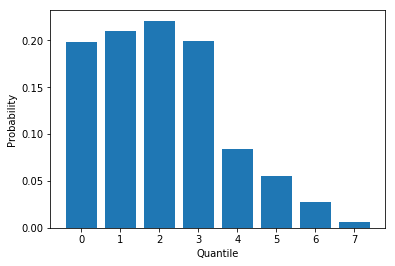

In [89]:
n = 1000
t = 1000
end = np.zeros(n)
for i in range(n):
    appr = markov.simulate(ts_length = t, init=1)
    end[i] = appr[t-1]

z0 = (end == 0).sum()/n
z1 = (end == 1).sum()/n
z2 = (end == 2).sum()/n
z3 = (end == 3).sum()/n
z4 = (end == 4).sum()/n
z5 = (end == 5).sum()/n
z6 = (end == 6).sum()/n
z7 = (end == 7).sum()/n

plt.bar(x, [z0, z1, z2, z3, z4, z5, z6, z7])
plt.xlabel('Quantile')
plt.ylabel('Probability')
plt.show()